# NN talk outline:

1) What is a NN really? It's just
    - linear transformation (/ projection into higher dimension)
    - pointwise nonlinearily 

per layer

$$ \sigma(XW_1)$$

$$ \sigma(\sigma(XW_1)W_2)$$

$$ \sigma(\sigma(\sigma(XW_1)W_2)W_3)$$


2) Training a NN, backpropagation, is really just the chain rule.

    - gradient descent (vary stepsize / add other randomness to encourage exploration, since prob in nonconvex)
    



3) The width of the NN, and the "shape" of the data it can sucessfully classify 

    - Think of data as geometric projections of particular (higher-dimensional) shapes.  

    - The topology of the shape represents the "truth" of the data generating process. 

    - The projection depends on the particular metrics we use for individual dimensions.

    - To say that the data conveys information, is to say that datapoints that are "close" on the shape are similar wrt the metric of interest.

# NN logic

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

def sigmoid_derivative(x):
    return x * (1.0 - x)


In [3]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.w_dims = [(self.x.shape[1], self.y.shape[1])]
        self.w = []
        self.layer_outputs = None
        
        
    def add_layer(self, n_dims):
        final_layer_dims = self.w_dims[-1] 
        self.w_dims[-1] = (final_layer_dims[0], n_dims)
        self.w_dims.append((n_dims, self.y.shape[1]))
    
    
    def initialise_weights(self):
        assert len(self.w) == 0
        
        for dims in self.w_dims:
            self.w.append(np.random.rand(*dims))
            
            
    def feed_forward(self, x):
        self.layer_outputs = [x]
        previous_layer = x
        
        for w in self.w:
            next_layer_output = sigmoid(np.dot(previous_layer, w))
            self.layer_outputs.append(next_layer_output)
            previous_layer = next_layer_output
            
            
    def back_prop(self, rate=0.5):
        dwl = self.calc_w_derivatives()
        for i in range(len(self.w)):
            self.w[i] += rate * dwl[i]
            
            
    def calc_w_derivatives(self):
        mismatch = self.y - self.layer_outputs[-1]
        dwl = []
        
        d = mismatch * sigmoid_derivative(self.layer_outputs[-1])
        dw = np.dot(self.layer_outputs[-2].T, d)
        dwl.append(dw)
        
        for i in range(len(self.w)-1, 0, -1):
            d = np.dot(d, self.w[i].T) * sigmoid_derivative(self.layer_outputs[i])
            dwl.append(np.dot(self.layer_outputs[i-1].T, d))
            
        return dwl[::-1]
    
    
    def train(self, n_iter=1000, rate=0.5):
        for i in range(n_iter):
            self.feed_forward(self.x)
            self.back_prop(rate=rate)
            
            
    def loss(self):
        return 0.5 * np.sum((self.layer_outputs[-1] - self.y)**2)
            

# Test

In [4]:
X = np.array([[0,0,1],
              [0,1,1],
              [1,0,1],
              [1,1,1],
              [1,1,1],
             ])
y = np.array([[0],[1],[1],[0], [0]])


nn = NeuralNetwork(X, y)
nn.add_layer(4)

In [5]:
nn.initialise_weights()

In [6]:
nn.train(n_iter=10000)

In [7]:
nn.layer_outputs[-1]

array([[0.0142498 ],
       [0.98684917],
       [0.98408893],
       [0.01046603],
       [0.01046603]])

In [8]:
nn.y

array([[0],
       [1],
       [1],
       [0],
       [0]])

# Smiles data

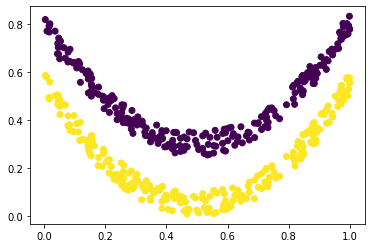

In [9]:
import numpy as np
from matplotlib import pyplot as plt

N_POINTS = 500

x1 = np.random.random(int(N_POINTS / 2))
x2a = 2*(x1-0.5)**2 + 0.1*np.random.rand(len(x1))
x2b = 2*(x1-0.5)**2 + 0.25 + 0.1*np.random.rand(len(x1))

ya = np.ones(len(x1))
yb = np.zeros(len(x1))

data = np.vstack((
    np.concatenate((x1, x1)), 
    np.concatenate((x2a, x2b)), 
    np.ones(N_POINTS),
    np.concatenate((ya, yb))
)).transpose()

np.random.shuffle(data)

plt.scatter(data[0:500, 0], data[0:500, 1], c=data[0:500, 3])
plt.show()

# 2D transformation example

In [35]:
w_0 = np.array(
    [[-4.44804236, -6.20811619],
     [ 4.12426349, -1.34118415]]
)

In [27]:
lt = np.dot(data[0:500, 0:2], w_0)
nt = sigmoid(lt)

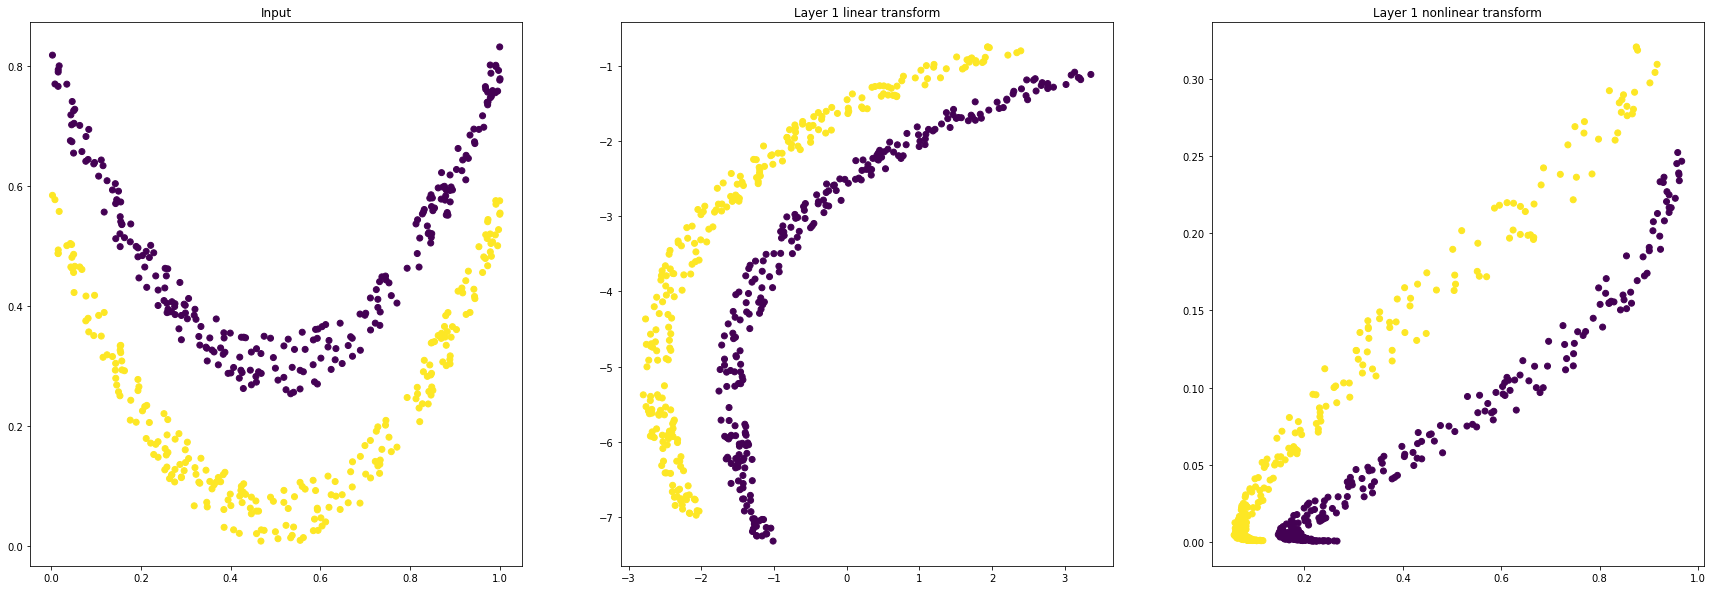

In [33]:
f = plt.figure(figsize=(30, 10))
ax = []
ax.append(f.add_subplot(131))
ax.append(f.add_subplot(132))
ax.append(f.add_subplot(133))

ax[0].scatter(data[0:500, 0], data[0:500, 1], c=data[0:500, 3])
ax[0].set_title('Input')

ax[1].scatter(lt[0:500, 0], lt[0:500, 1], c=data[0:500, 3])
ax[1].set_title('Layer 1 linear transform')

ax[2].scatter(nt[0:500, 0], nt[0:500, 1], c=data[0:500, 3])
ax[2].set_title('Layer 1 nonlinear transform');

# Input --> 2 x 2 --> output animation 

In [22]:
X = data[:, 0:2]
y = np.expand_dims(data[:, 3], axis=1)
nn = NeuralNetwork(X ,y)

nn.add_layer(2)
nn.add_layer(2)

nn.initialise_weights()

In [23]:
from matplotlib import animation
from IPython import display

nn.train(n_iter=10, rate=.05)

f = plt.figure(figsize=(30, 15))
ax = []
ax.append(f.add_subplot(251))
ax.append(f.add_subplot(252))
ax.append(f.add_subplot(253))
ax.append(f.add_subplot(254))
ax.append(f.add_subplot(255))
ax.append(f.add_subplot(212))


plot0 = ax[0].scatter(
    data[0:500, 0], 
    data[0:500, 1], 
    c=data[0:500, 3]
)
ax[0].set_ylim([-0.1, 1.1])
ax[0].set_xlim([-0.1, 1.1])

plot1 = ax[1].scatter(
    nn.layer_outputs[1][0:500, 0],
    nn.layer_outputs[1][0:500, 1],
    c=data[0:500, 3]
)
ax[1].set_ylim([-0.1, 1.1])
ax[1].set_xlim([-0.1, 1.1])

plot2 = ax[2].scatter(
    nn.layer_outputs[2][0:500, 0],
    nn.layer_outputs[2][0:500, 1],
    c=data[0:500, 3]
)
ax[2].set_ylim([-0.1, 1.1])
ax[2].set_xlim([-0.1, 1.1])

plot3 = ax[3].scatter(
    nn.layer_outputs[3][0:500, 0],
    1-nn.layer_outputs[3][0:500, 0],
    c=data[0:500, 3]
)
ax[3].set_ylim([-0.1, 1.1])
ax[3].set_xlim([-0.1, 1.1])

plot4 = ax[4].scatter(
    data[0:500, 0], 
    data[0:500, 1], 
    c=nn.layer_outputs[3][0:500, 0]
)
ax[4].set_ylim([-0.1, 1.1])
ax[4].set_xlim([-0.1, 1.1])

ax[5].set_xlim([0, 50])
ax[5].set_ylim([0, 100])

loss = [nn.loss()]
line, = ax[5].plot([0], loss)

def anim(i):
    nn.train(n_iter=50, rate=.02)
    loss.append(nn.loss())
    
    plot1.set_offsets(nn.layer_outputs[1][0:500, 0:2])
    plot1.set_array(data[0:500, 3])
    
    plot2.set_offsets(nn.layer_outputs[2][0:500, 0:2])
    plot2.set_array(data[0:500, 3])
    
    plot3.set_offsets(
        np.concatenate([
        nn.layer_outputs[3][0:500, :],
        1-nn.layer_outputs[3][0:500, :]
               ], axis=1)
    )
    plot3.set_array(data[0:500, 3])
    plot4.set_array(nn.layer_outputs[3][0:500, 0])
    
    line.set_data(range(len(loss)), loss)
    
    
anim = animation.FuncAnimation(f, anim,
                               frames=50, 
                               interval=400, 
                               blit=False);
plt.close()

In [24]:
# loss

In [25]:
writergif = animation.PillowWriter(fps=2) 
anim.save('smiles.gif', writer=writergif)

# Video

![](smiles.gif)

# Circles

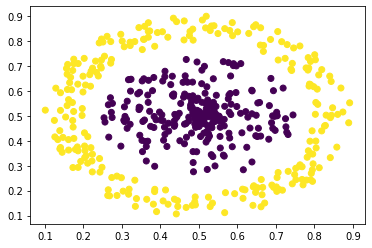

In [64]:
N_POINTS = 500

rad1 = 0.3 + 0.1 * np.random.rand(int(N_POINTS / 2))
rad2 = 0.25 * np.random.rand(int(N_POINTS / 2))
rad = np.concatenate((rad1, rad2))

angle = np.random.rand(N_POINTS)*np.pi*2
x = rad * np.cos(angle) + 0.5
y = rad * np.sin(angle) + 0.5

ya = np.ones(int(N_POINTS / 2))
yb = np.zeros(int(N_POINTS / 2))

data = np.vstack((x, y,  np.ones(N_POINTS), np.concatenate((ya, yb)))).transpose()
np.random.shuffle(data)

plt.scatter(data[0:500, 0], data[0:500, 1], c=data[0:500, 3])
plt.show()


# Input --> 2 x 2 --> output animation 

In [106]:
X = data[:, 0:2]
y = np.expand_dims(data[:, 3], axis=1)
nn = NeuralNetwork(X ,y)

nn.add_layer(2)
nn.add_layer(2)

nn.initialise_weights()

In [107]:
from matplotlib import animation
from IPython import display

nn.train(n_iter=10, rate=.1)

f = plt.figure(figsize=(30, 15))
ax = []
ax.append(f.add_subplot(251))
ax.append(f.add_subplot(252))
ax.append(f.add_subplot(253))
ax.append(f.add_subplot(254))
ax.append(f.add_subplot(255))
ax.append(f.add_subplot(212))


plot0 = ax[0].scatter(
    data[0:500, 0], 
    data[0:500, 1], 
    c=data[0:500, 3]
)
ax[0].set_ylim([-0.1, 1.1])
ax[0].set_xlim([-0.1, 1.1])

plot1 = ax[1].scatter(
    nn.layer_outputs[1][0:500, 0],
    nn.layer_outputs[1][0:500, 1],
    c=data[0:500, 3]
)
ax[1].set_ylim([-0.1, 1.1])
ax[1].set_xlim([-0.1, 1.1])

plot2 = ax[2].scatter(
    nn.layer_outputs[2][0:500, 0],
    nn.layer_outputs[2][0:500, 1],
    c=data[0:500, 3]
)
ax[2].set_ylim([-0.1, 1.1])
ax[2].set_xlim([-0.1, 1.1])

plot3 = ax[3].scatter(
    nn.layer_outputs[3][0:500, 0],
    1-nn.layer_outputs[3][0:500, 0],
    c=data[0:500, 3]
)
ax[3].set_ylim([-0.1, 1.1])
ax[3].set_xlim([-0.1, 1.1])

plot4 = ax[4].scatter(
    data[0:500, 0], 
    data[0:500, 1], 
    c=nn.layer_outputs[3][0:500, 0]
)
ax[4].set_ylim([-0.1, 1.1])
ax[4].set_xlim([-0.1, 1.1])

ax[5].set_xlim([0, 50])
ax[5].set_ylim([0, 100])

loss = [nn.loss()]
line, = ax[5].plot([0], loss)

def anim(i):
    nn.train(n_iter=100, rate=.1)
    loss.append(nn.loss())
    
    plot1.set_offsets(nn.layer_outputs[1][0:500, 0:2])
    plot1.set_array(data[0:500, 3])
    
    plot2.set_offsets(nn.layer_outputs[2][0:500, 0:2])
    plot2.set_array(data[0:500, 3])
    
    plot3.set_offsets(
        np.concatenate([
        nn.layer_outputs[3][0:500, :],
        1-nn.layer_outputs[3][0:500, :]
               ], axis=1)
    )
    plot3.set_array(data[0:500, 3])
    plot4.set_array(nn.layer_outputs[3][0:500, 0])
    
    line.set_data(range(len(loss)), loss)
    
    
anim = animation.FuncAnimation(f, anim,
                               frames=50, 
                               interval=400, 
                               blit=False);
plt.close()

In [108]:
writergif = animation.PillowWriter(fps=2) 
anim.save('circles2d.gif', writer=writergif)

# Video

![](circles2d.gif)

# Input --> 3 x 3 --> output animation 

In [117]:
X = data[:, 0:3]
y = np.expand_dims(data[:, 3], axis=1)
nn = NeuralNetwork(X ,y)

nn.add_layer(3)
nn.add_layer(3)

nn.initialise_weights()

In [118]:
# nn.layer_outputs[2]

In [119]:
from matplotlib import animation
from IPython import display
from mpl_toolkits.mplot3d import Axes3D

nn.train(n_iter=10, rate=.1)

f = plt.figure(figsize=(30, 15))
ax = []
ax.append(f.add_subplot(251))
ax.append(f.add_subplot(252, projection='3d'))
ax.append(f.add_subplot(253, projection='3d'))
ax.append(f.add_subplot(254))
ax.append(f.add_subplot(255))
ax.append(f.add_subplot(212))


plot0 = ax[0].scatter(
    data[0:500, 0], 
    data[0:500, 1], 
    c=data[0:500, 3]
)
ax[0].set_ylim([-0.1, 1.1])
ax[0].set_xlim([-0.1, 1.1])

plot1 = ax[1].scatter(
    nn.layer_outputs[1][0:500, 0],
    nn.layer_outputs[1][0:500, 1],
    nn.layer_outputs[1][0:500, 2],
    c=data[0:500, 3]
)
ax[1].set_ylim([-0.1, 1.1])
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_zlim([-0.1, 1.1])

plot2 = ax[2].scatter(
    nn.layer_outputs[2][0:500, 0],
    nn.layer_outputs[2][0:500, 1],
    nn.layer_outputs[2][0:500, 2],
    c=data[0:500, 3]
)
ax[2].set_ylim([-0.1, 1.1])
ax[2].set_xlim([-0.1, 1.1])
ax[2].set_zlim([-0.1, 1.1])

plot3 = ax[3].scatter(
    nn.layer_outputs[3][0:500, 0],
    1-nn.layer_outputs[3][0:500, 0],
    c=data[0:500, 3]
)
ax[3].set_ylim([-0.1, 1.1])
ax[3].set_xlim([-0.1, 1.1])

plot4 = ax[4].scatter(
    data[0:500, 0], 
    data[0:500, 1], 
    c=nn.layer_outputs[3][0:500, 0]
)
ax[4].set_ylim([-0.1, 1.1])
ax[4].set_xlim([-0.1, 1.1])

ax[5].set_xlim([0, 60])
ax[5].set_ylim([0, 100])

loss = [nn.loss()]
line, = ax[5].plot([0], loss)

def anim(i):
    nn.train(n_iter=90, rate=.02)
    loss.append(nn.loss())
    
    plot1._offsets3d = (
        nn.layer_outputs[1][0:500, 0],
        nn.layer_outputs[1][0:500, 1],
        nn.layer_outputs[1][0:500, 2],
    )
    plot1.set_array(data[0:500, 3])
    
    plot2._offsets3d = (
        nn.layer_outputs[2][0:500, 0],
        nn.layer_outputs[2][0:500, 1],
        nn.layer_outputs[2][0:500, 2],
    )
    plot2.set_array(data[0:500, 3])
    
    plot3.set_offsets(
        np.concatenate([
        nn.layer_outputs[3][0:500, :],
        1-nn.layer_outputs[3][0:500, :]
               ], axis=1)
    )
    plot3.set_array(data[0:500, 3])
    plot4.set_array(nn.layer_outputs[3][0:500, 0])
    
    line.set_data(range(len(loss)), loss)
    
    
anim = animation.FuncAnimation(f, anim,
                               frames=60, 
                               interval=400, 
                               blit=False);
plt.close()

In [120]:
writergif = animation.PillowWriter(fps=2) 
anim.save('circles3d.gif', writer=writergif)

#  Video

![](circles3d.gif)

# Scratch

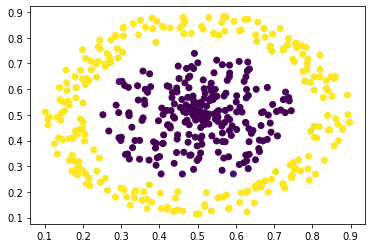

In [22]:
plt.scatter(X[0:500, 0], X[0:500, 1], c=nn.layer_outputs[-1][0:500])
plt.show()